#2-3

In [6]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from keras.datasets import mnist

In [13]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [14]:
len(x_train)

60000

In [15]:
len(y_train)

60000

In [16]:
x_train[9487].shape

(28, 28)

In [17]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

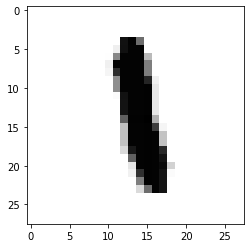

In [18]:
plt.imshow(x_train[9487], cmap='Greys')

In [19]:
y_train[9487]

1

#2-4

In [22]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [25]:
from keras.utils import np_utils

In [26]:
y_train = np_utils.to_categorical(y_train, 10)

In [27]:
y_test = np_utils.to_categorical(y_test, 10)

In [28]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#2-5